## A - Seleção e testes de tecnicas de sampling

### 0 - Bibliotecas

In [1]:
# pip install imblearn
# pip install pandas-profiling

In [2]:
## Processamento de dados
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import random

## Vusualização de dados
from IPython.display import Image

## 1 - Introdução

Dados atravessam por um ciclo produtivo até atingir condições de uso, em empresas e organizações. Em geral, seu uso é caraterizado através de tomada de decisões, ações, por individuos ou grupo de indivídos. Este uso de dados pode ser caracterizado também como produção do conhecimento.

Este ciclo passa por etapas macro, da Produção dos dados, por sistemas, sensores e dispositivos móveis, por exemplo, na Gestão dos Dados, envolvendo o armazenamento, catalogação, e o gerenciamento de recursos computacionais (processos, armazenamento, processamento e distribuição).
Após a Produção e a Gestão dos Dados, os dados provenientes de diversas fontes passam por uma etapa de pré-processamento para em seguida seu uso, através de buscas, consultas, data discovery, dashboards, monitoramento de indicadores, e a aplicação de algortimos de Inteligencia Artifical (IA), abrangendo suas subdivisões (aprendizado de máquina (AM) e aprendizado profundo(AP)), conforme figura abaixo:

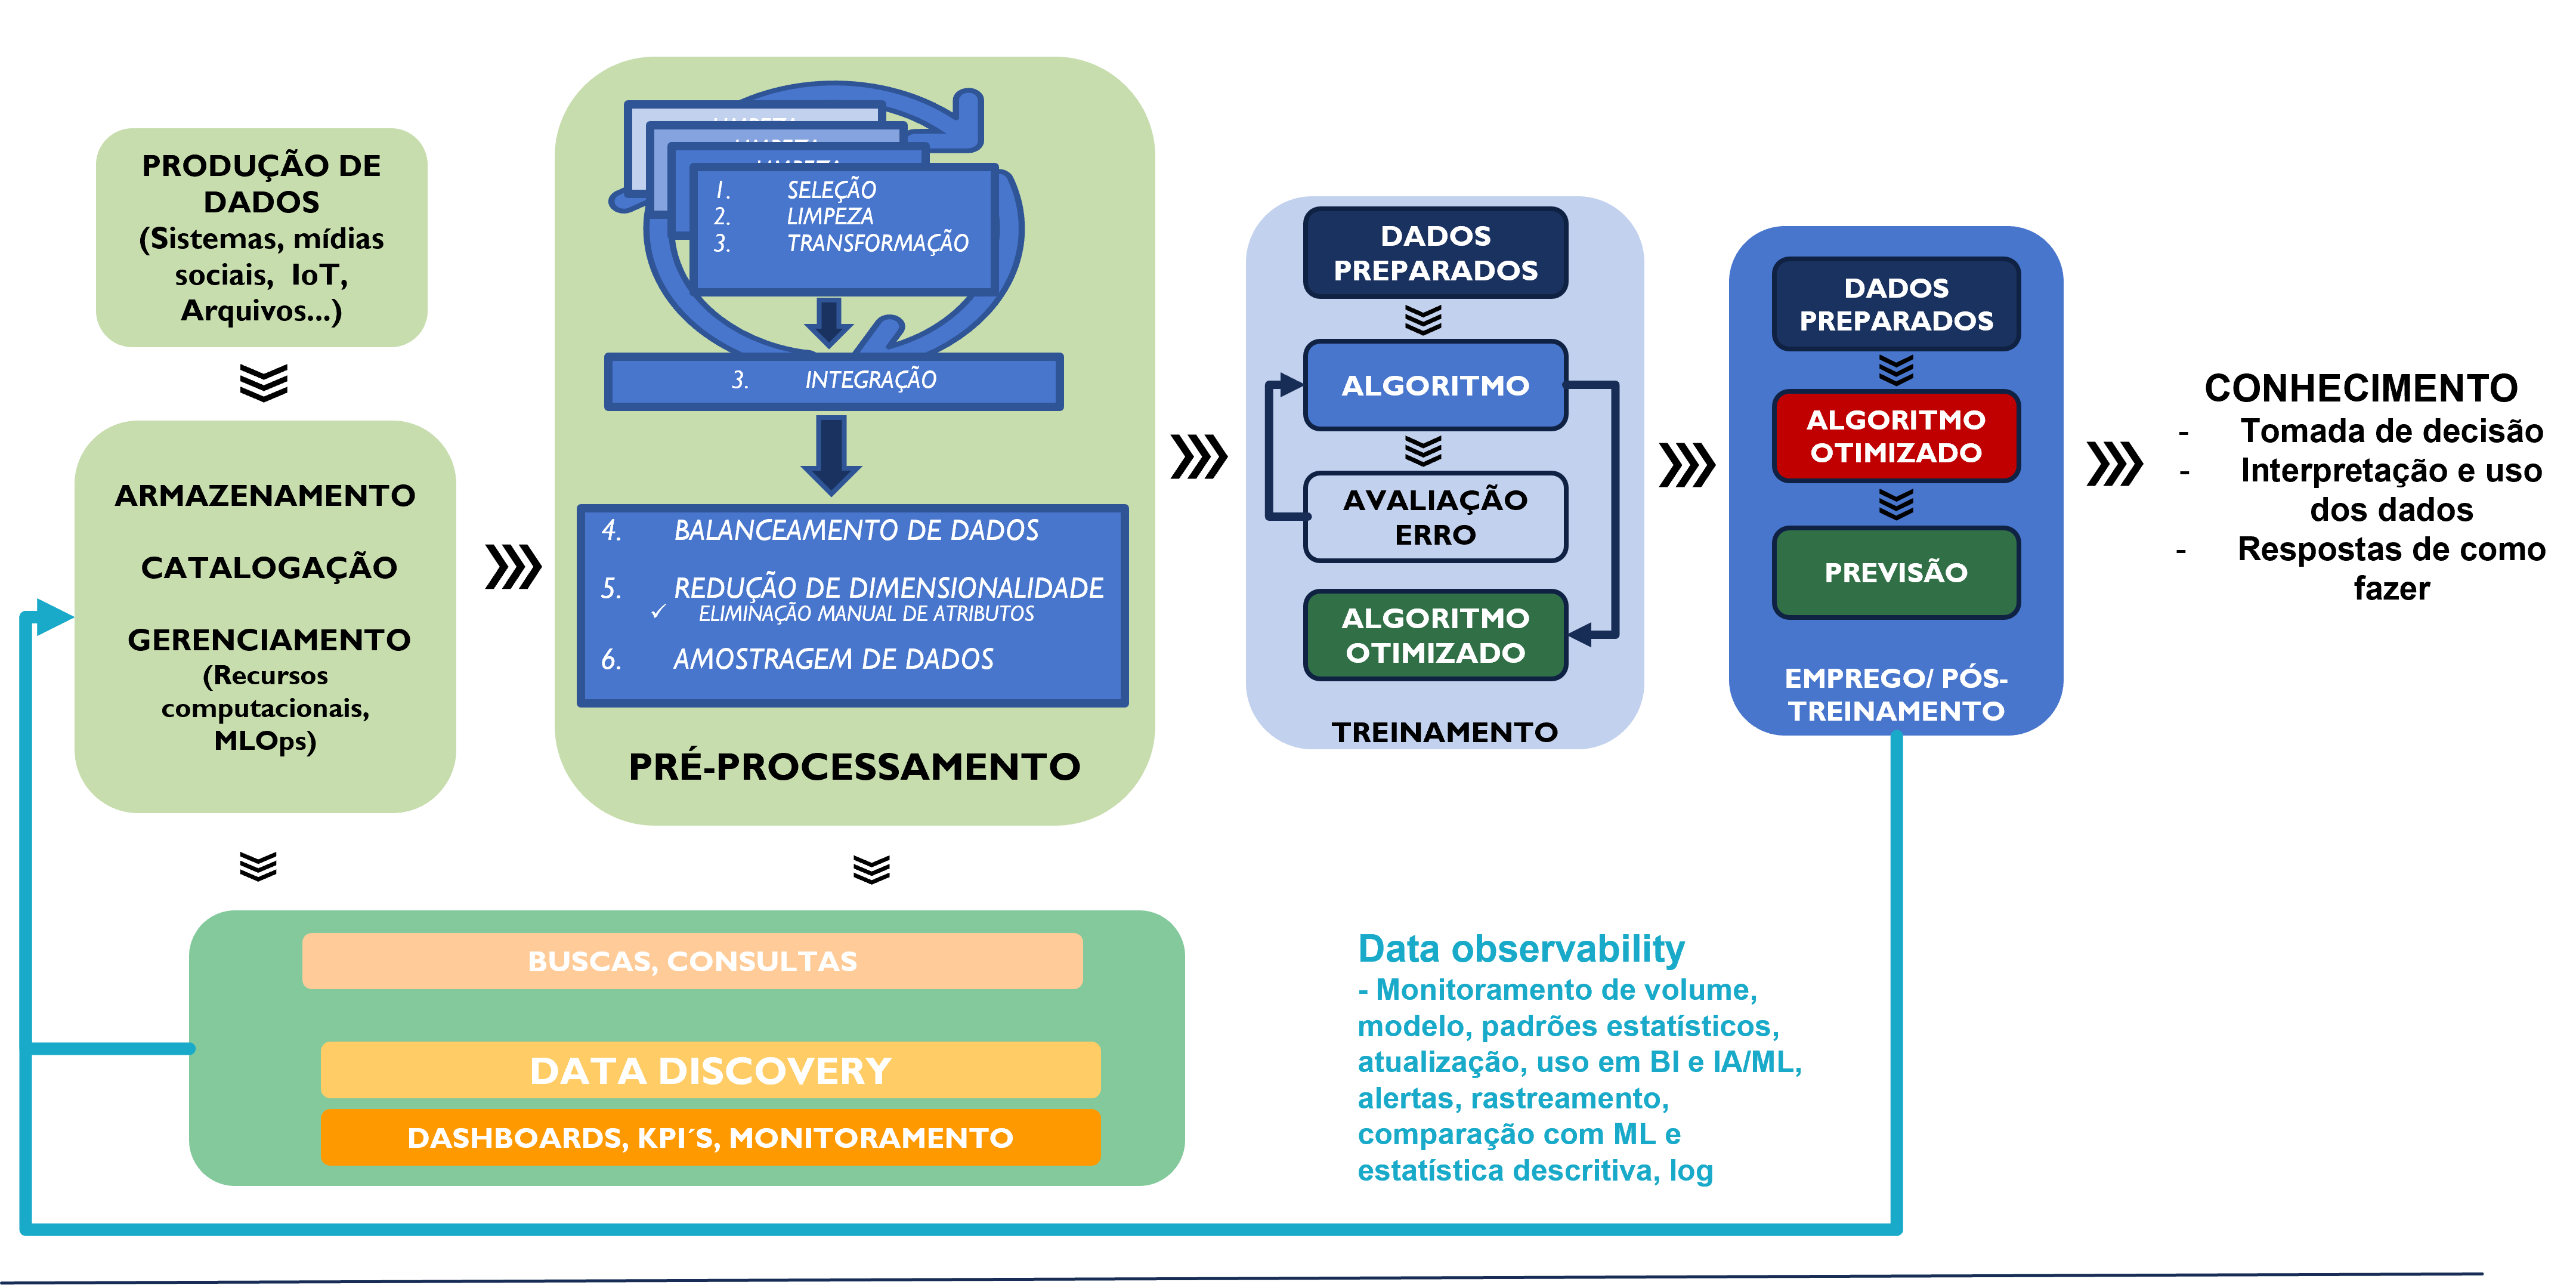

In [3]:
Image("ciclodados.png")

O emprego de algoritmos de IA, AM e AP é intensivo no uso de processamento de dados, e esta intensidade aumenta quando são utilizados grandes volumes de dados (big data) seja na sua quantidade/volume, na velocidade de produção e na variedade de tipos e estruturas de dados.

Este trabalho tem por objetivo avaliar técnicas de amostragem, que é a seleção de um sub-conjunto de elementos de uma base de dados, para adequar a quantidade de elementos a um algortimo.

Diversas técnicas de amostragem foram desenvolvidas, evoluindo de um objetivo simplificado, de diminuir o tamanho do dado, para uma seleção ideal, aonde o equilibrio entre a eficiencia computacional e a acurácia (taxas de predições corretas) é buscado. Ou seja, busca-se não somente a redução, mas a representatividade estatística da amostragem.

Um fator especifico para emprego de IA/AM/AP que deve ser considerado no emprego de tecnicas de amostragem é que custos computacionais e o tempo para a produção da amostra e seu emprego em um algoritmo deve ser menor que o custo/tempo de emprego do mesmo algoritmo em toda a base de dados.

## 2 -  Caracterização da amostragem

### 2.1 - Tipos de técnicas de amostragem, por seleção

Amostragem probabilística - seleção aleatória elementos aleatórios de um conjunto de dados, com diferentes critérios de seleção.
- A. Amostragem Aleatória Simples (AAS)
- B. Amostragem Sistemática (AS)
- C. Amostragem por Conglomerados ou Clusters (AC)
- D. Amostragem Ponderada (AP)
- E. Amostragem Estratificada (AE)
----
Amostragem não-probabilistica - seleção de elementos pelo analista de dados, com base em seu conhecimento
- F. Amostragem de Especialista de Domínio (AED)
    - Por conveniência
    - Por julgamento
    - Por Cotas
    - Bola de neve
    - Desproporcional


Para fins de delimitação deste trabalho, focaremos nas seleções probabilísticas, que são as mais indicadas para generalização de resultados.

### 2.2 - Definição de tamanho da amostra

Não fez parte deste estudo a avaliação de técnicas de delimitaçao de amostras.

### 2.3 - Criação de dataset sintético - para demonstração

In [4]:
N=10000
price_vb  = pd.Series(np.random.uniform(1,4,size = N))
id = pd.Series(np.arange(0,len(price_vb),1))
event_type = pd.Series(np.random.choice(["soja","milho","trigo"],size = len(price_vb)))
df = pd.concat([id,price_vb,event_type],axis = 1)
df.columns = ["id","Preço","Tipo"]
### Contagem de atributos categóricos e percentuais
Contagem_Tipo_Original = pd.DataFrame(df["Tipo"].value_counts())
Contagem_Tipo_Original.columns = ["Quantidade"]
Contagem_Tipo_Original.index.name = 'Tipo'
Contagem_Tipo_Original=Contagem_Tipo_Original.sort_index()
percent0 = pd.Series((Contagem_Tipo_Original['Quantidade'] / Contagem_Tipo_Original['Quantidade'].sum()) * 100)
Contagem_Tipo_Original ['Percent'] = percent0
print(df)
print(Contagem_Tipo_Original)

        id     Preço   Tipo
0        0  2.188563  trigo
1        1  2.603606  trigo
2        2  1.940107  trigo
3        3  1.507405   soja
4        4  2.633950   soja
...    ...       ...    ...
9995  9995  3.169940  milho
9996  9996  3.655720   soja
9997  9997  3.863699   soja
9998  9998  2.581213  milho
9999  9999  1.518691   soja

[10000 rows x 3 columns]
       Quantidade  Percent
Tipo                      
milho        3365    33.65
soja         3308    33.08
trigo        3327    33.27


### 2.A - Amostragem Aleatória Simples (AAS)

Esta técnica pressupõe que a amostragem é feita a partir de uma seleção aonde todos os elementos escolhidos possuirão a mesma probabilidade de serem selecionados. Por exemplo, se o conjunto possui 10.000 objetos e pretende-se selecionar 500, serão selecionados, aleatoriamente, 500 objetos. Aqui, há uma variação na forma como os elementos selecionados interagem com a seleção total.

- A.A.S. - seleção  COM reposição - o elemento selecionado retorna ao conjunto e pode ser selecionado novamente

In [5]:
df_aas_COM = df.sample(n=500, replace=False)
#    frac=0.05, 
#    replace=False, 
#    weights=None, 
#    random_state=None, 
#    axis=None, 
#    ignore_index=False)

In [6]:
## Calculando quantidade valores únicos e percentuais do campo "Tipo" da amostra
Contagem_Tipo_aas_COM = pd.DataFrame(df_aas_COM["Tipo"].value_counts())
Contagem_Tipo_aas_COM.columns = ["Quantidade"]
Contagem_Tipo_aas_COM.index.name = 'Tipo'
Contagem_Tipo_aas_COM=Contagem_Tipo_aas_COM.sort_index()
percentcom = pd.Series((Contagem_Tipo_aas_COM['Quantidade'] / Contagem_Tipo_aas_COM['Quantidade'].sum()) * 100)
Contagem_Tipo_aas_COM ['Percent'] = percentcom
print(Contagem_Tipo_aas_COM)

       Quantidade  Percent
Tipo                      
milho         155     31.0
soja          177     35.4
trigo         168     33.6


In [7]:
# Comparação da quantidade de valores unicos do atributo 'Tipo' entre o orginal e amostra
Contagem_Tipo_Original.compare(Contagem_Tipo_aas_COM,keep_shape=True, keep_equal=True)
# self - original dataset
# other - amostra

Quantidade       Percent      
            self other    self other
Tipo                                
milho       3365   155   33.65  31.0
soja        3308   177   33.08  35.4
trigo       3327   168   33.27  33.6

- A.A.S. - seleção  SEM reposição - o elemento selecionado NÃO retorna ao conjunto e NÃO pode ser selecionado novamente (Mais eficiente. Pearson, 2005).

In [8]:
df_aas_SEM = df.sample(n=500, replace=True)
#    frac=0.05, 
#    replace=False, 
#    weights=None, 
#    random_state=None, 
#    axis=None, 
#    ignore_index=False)

In [9]:
## Calculando quantidade valores únicos do campo "Tipo" da amostra
Contagem_Tipo_aas_SEM = pd.DataFrame(df_aas_SEM["Tipo"].value_counts())
Contagem_Tipo_aas_SEM.columns = ["Quantidade"]
Contagem_Tipo_aas_SEM.index.name = 'Tipo'
Contagem_Tipo_aas_SEM=Contagem_Tipo_aas_SEM.sort_index()
percentsem = pd.Series((Contagem_Tipo_aas_SEM['Quantidade'] / Contagem_Tipo_aas_SEM['Quantidade'].sum()) * 100)
Contagem_Tipo_aas_SEM ['Percent'] = percentsem
print(Contagem_Tipo_aas_SEM)

       Quantidade  Percent
Tipo                      
milho         165     33.0
soja          149     29.8
trigo         186     37.2


In [10]:
# Comparação da quantidade de valores unicos do atributo 'Tipo' entre o orginal e amostra
Contagem_Tipo_Original.compare(Contagem_Tipo_aas_SEM,keep_shape=True, keep_equal=True)
# self - original dataset
# other - amostra

Quantidade       Percent      
            self other    self other
Tipo                                
milho       3365   165   33.65  33.0
soja        3308   149   33.08  29.8
trigo       3327   186   33.27  37.2

### 2.B -  Amostragem Sistemática (AS)

Esta técnica amostragem utiliza a seleção de elementos de um conjunto de dados sequencialmente, aonde um ponto inicial é definido (o primeiro elemento, por exemplo), e um intervalo regular (a cada n elementos). Por exemplo, em um conjunto de 100 registros, iniciar a partir do 5o. elemento, a cada dez elementos (5, 15, 25...).

- O intervalo é calculado dividindo a população pelo tamanho da amostra desejada Por exemplo, pop de 12 elementos, com 3 amostras, 12/3=4, a partir do número 1 = (1, 5, 9)

In [11]:
# Criação de função que gera uma amostragem alaeatória sistemática
def systematic_sampling(df, step):
    selected_index = np.arange(1,len(df),step)
    # using iloc for getting thee data with selected indices
    systematic_sampling = df.iloc[selected_index]
    return(systematic_sampling)

n = 500
step = int(N/n)
AS = systematic_sampling(df, step)
AS

,id,Preço,Tipo
1,1,2.603606,trigo
21,21,2.451572,trigo
41,41,1.299334,milho
61,61,2.169158,milho
81,81,1.136866,trigo
...,...,...,...
9901,9901,2.831497,trigo
9921,9921,2.745027,milho
9941,9941,3.879542,soja
9961,9961,1.653229,soja


In [12]:
##### COMPARATIVO PERCENTUAL
Contagem_AS = pd.DataFrame(AS["Tipo"].value_counts())
Contagem_AS.columns = ["Quantidade"]
Contagem_AS.index.name = 'Tipo'
Contagem_AS=Contagem_AS.sort_index()
percentAS = pd.Series((Contagem_AS['Quantidade'] / Contagem_AS['Quantidade'].sum()) * 100)
Contagem_AS ['Percent'] = percentAS
# print(Contagem_AS)

### 2.C -  Amostragem por Conglomerados ou Clusters (AC)

Esta técnica de seleção também trabalha com a definição de subconjuntos, mas cada subconjunto deve possuir características similares ao conjunto de dados, e a partir dai, são selecionados subconjuntos inteiros até se atingir o tamanho da amostra desejada. 

In [13]:
# criação de função de amostragem por clusterização
def get_clustered_Sample(df, n_per_cluster, num_select_clusters):
    N = len(df)
    K = int(N/n_per_cluster)
    data = None
    for k in range(K):
        sample_k = df.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

AC = get_clustered_Sample(df = df, n_per_cluster = 100, num_select_clusters =5)
AC

,id,Preço,Tipo,cluster
817,817,1.941726,trigo,5
6224,6224,3.375360,milho,5
2509,2509,2.228098,soja,5
112,112,1.165782,trigo,5
9450,9450,3.810102,milho,5
...,...,...,...,...
5759,5759,1.839970,trigo,79
5854,5854,3.925971,milho,79
2058,2058,2.597998,soja,79
6893,6893,2.518961,trigo,79


In [14]:
##### COMPARATIVO PERCENTUAL
Contagem_AC = pd.DataFrame(AC["Tipo"].value_counts())
Contagem_AC.columns = ["Quantidade"]
Contagem_AC.index.name = 'Tipo'
Contagem_AC=Contagem_AC.sort_index()
percentAC = pd.Series((Contagem_AC['Quantidade'] / Contagem_AC['Quantidade'].sum()) * 100)
Contagem_AC ['Percent'] = percentAC
# print(Contagem_AC)

### 2.D - Amostragem Ponderada (AP)

Amostragem que considera um peso associado a cada elemento; por exemplo, criar uma amostra de consultas em um mecanismo de buscas, considerando a quantidade de vezes que estas consultas foram realizadas - este método compensa a seleção de elementos observações específicas com probabilidades desiguais (oversampling), não-cobertura, não-respostas e outros tipos de viés

In [15]:
def get_weighted_sample(df,n):
    def get_class_prob(x):
        weight_x = int(np.rint(n * len(x[x.Preço != 0]) / len(df[df.Preço != 0])))
        sampled_x = x.sample(weight_x).reset_index(drop=True)
        return (sampled_x)
        # we are grouping by the target class we use for the proportions

    weighted_sample = df.groupby('Tipo').apply(get_class_prob)
    print(weighted_sample["Tipo"].value_counts())
    return (weighted_sample)
AP = get_weighted_sample(df,500)
#sample

milho    168
trigo    166
soja     165
Name: Tipo, dtype: int64


In [16]:
##### COMPARATIVO PERCENTUAL
Contagem_AP = pd.DataFrame(AP["Tipo"].value_counts())
Contagem_AP.columns = ["Quantidade"]
Contagem_AP.index.name = 'Tipo'
Contagem_AP=Contagem_AP.sort_index()
percentAP = pd.Series((Contagem_AP['Quantidade'] / Contagem_AP['Quantidade'].sum()) * 100)
Contagem_AP ['Percent'] = percentAP
#print(Contagem_AP)

### 2.E - Amostragem Estratificada (AE)

A AE é uma combinação das técnicas de amostragem de cluster e da amostragem ponderada.

Tecnica de amostragem onde dividimos uma população em subpopulações homogêneas chamadas estratos com base em características específicas (por exemplo, idade, raça, identidade de gênero,  localização, tipo de evento, etc.). Cada elemento do conj de dados encontram-se em um único estrato; Cada estrato é amostrado e é possível estimar medidas estatisticas para cada um deles; Esta técnica é usada quando queremos assegurar que todas as características do conjunto de dados serão representados na amostra

Esta técnica foca em três etapas:
1. Selecionar vários subconjuntos/estratos homogeneos, aonde cada elemento deve pertencer a somente a um subconjunto.
2. Aplicar uma amostragem aleatória simples em cada estrato.
3. Unir estas amostragens de cada estrato em um unico subconjunto.

O objetivo é reduzir o erro amostral, com médias ponderadas com menor variabilidade do que uma média aritmética de uma amostra aleatória simples em todo o conjunto.

Esta técnica costuma ser aplicada em bases de dados que já encontram-se agrupadas em estratos, ou possuem pequena variedade de grupos. O custo computacional é grande e inviabiliza seu uso em bases de dados com grande variedade de estratos. Esta técnica possui variações, conforme abaixo:

#### 2.E.1 - A.E. Simples ou uniforme
- Utiliza o mesmo numero de objetos para cada classe/camada.
- Por exemplo, se o conjunto possui 100.000 objetos e pretende-se selecionar 1% (ou 1000 elementos), e o mesmo pode ser estratificado em três grupos, então cada grupo fornecerá 333-333-334 objetos;


#### 2.E.2 - A.E. Proporcional
- Utiliza uma quantidade proporcional de objetos para cada classe.
- Por exemplo, se o conjunto possui 100.000 objetos e pretende-se selecionar 1%, e o mesmo pode ser estratificado em três grupos, e os grupos possuem as seguintes quantidades: 50.0000, 30.000 e 20.000, então cada grupo fornecerá, respectivamente, 500, 300 e 200 objetos;

#### 2.E.3 - A.E. com desvio-padrão ótimo
- Utiliza uma quantidade proporcional ao desvio-padrão dos objetos do conjunto de dados. Ou seja, camadas com maior variabilidade interna gerarão maiores contribuições para a amostra.

In [17]:
#### Adição de dimensão
cat = pd.Series(np.random.choice([0,1],size = len(price_vb)))
df ['Categoria'] = cat
#### AE
def get_startified_sample(df,n,num_clusters_needed):
    N = len(df)
    num_obs_per_cluster = int(N/n)
    K = int(N/num_obs_per_cluster)

    def get_weighted_sample(df,num_obs_per_cluster):
        def get_sample_per_class(x):
            n_x = int(np.rint(num_obs_per_cluster*len(x[x.Categoria !=0])/len(df[df.Categoria !=0])))
            sample_x = x.sample(n_x)
            return(sample_x)
        weighted_sample = df.groupby("Tipo").apply(get_sample_per_class)
        return(weighted_sample)

    stratas = None
    for k in range(K):
        weighted_sample_k = get_weighted_sample(df,num_obs_per_cluster).reset_index(drop = True)
        weighted_sample_k["cluster"] = np.repeat(k,len(weighted_sample_k))
        stratas = pd.concat([stratas, weighted_sample_k],axis = 0)
        df.drop(index = weighted_sample_k.index)
    selected_strata_clusters = np.random.randint(0,K,size = num_clusters_needed)
    stratified_samples = stratas[stratas.cluster.isin(selected_strata_clusters)]
    return(stratified_samples)

AE = get_startified_sample(df = df,n = 100,num_clusters_needed = 5)
AE

,id,Preço,Tipo,Categoria,cluster
0,4531,3.923226,milho,1,43
1,7543,1.759825,milho,0,43
2,7695,2.941157,milho,1,43
3,4490,1.906136,milho,0,43
4,6030,1.555286,milho,1,43
...,...,...,...,...,...
95,4312,1.015860,trigo,1,92
96,9433,1.064571,trigo,0,92
97,6659,2.802916,trigo,1,92
98,400,1.957080,trigo,1,92


In [18]:
##### COMPARATIVO PERCENTUAL
Contagem_AE = pd.DataFrame(AE["Tipo"].value_counts())
Contagem_AE.columns = ["Quantidade"]
Contagem_AE.index.name = 'Tipo'
Contagem_AE=Contagem_AE.sort_index()
percentAE = pd.Series((Contagem_AE['Quantidade'] / Contagem_AE['Quantidade'].sum()) * 100)
Contagem_AE ['Percent'] = percentAE
# print(Contagem_AE)

#### CONCLUSÃO PARCIAL - RANKING DAS MELHORES TÉCNICAS DE SAMPLING A PARTIR DE UMA BASE AMOSTRAL DE 10000 REGISTROS, 500 AMOSTRAS

In [19]:
Ranking = pd.DataFrame()
index = ['milho', 'soja', 'trigo']
Ranking = pd.DataFrame(index=index)
Ranking ['Original'] = percent0
Ranking ['Ponderada'] = percentAP
Ranking ['AE'] = percentAE
Ranking ['AAS-COM'] = percentcom
Ranking ['AAS-SEM'] = percentsem
Ranking ['Cluster'] = percentAC
Ranking ['Sistemática'] = percentAS
Ranking

,Original,Ponderada,AE,AAS-COM,AAS-SEM,Cluster,Sistemática
milho,33.65,33.667335,34.0,31.0,33.0,34.4,31.8
soja,33.08,33.066132,33.0,35.4,29.8,31.6,33.0
trigo,33.27,33.266533,33.0,33.6,37.2,34.0,35.2


#### Amostragem ponderada e estratificada obtiveram os melhores resultados

In [20]:
EstDescritiva = pd.DataFrame()
index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
EstDescritiva = pd.DataFrame(index=index)
EstDescritiva ['Original'] = (df.Preço.describe())
EstDescritiva  ['AAS-COM'] = (df_aas_COM.Preço.describe())
EstDescritiva  ['AAS-SEM'] = (df_aas_SEM.Preço.describe())
EstDescritiva  ['Sistemática'] = (AS.Preço.describe())
EstDescritiva  ['Ponderada'] = (AP.Preço.describe())
EstDescritiva  ['Cluster'] = (AC.Preço.describe())
EstDescritiva  ['AE'] = (AE.Preço.describe())
EstDescritiva

,Original,AAS-COM,AAS-SEM,Sistemática,Ponderada,Cluster,AE
count,10000.000000,500.000000,500.000000,500.000000,499.000000,500.000000,500.000000
mean,2.498164,2.449008,2.484311,2.446251,2.574797,2.500813,2.460073
std,0.868852,0.878724,0.842256,0.863581,0.861957,0.877730,0.874555
min,1.000042,1.000783,1.019214,1.000783,1.000042,1.006695,1.004476
25%,1.749265,1.674038,1.796069,1.788166,1.856805,1.781109,1.643939
50%,2.511635,2.431826,2.493420,2.363996,2.629375,2.513171,2.513303
75%,3.243257,3.174291,3.180119,3.202051,3.313130,3.266431,3.202560
max,3.999939,3.999939,3.988359,3.999190,3.995434,3.997539,3.988579


#### Amostragem aleatória simples - com e sem reposição - obtiveram os melhores resultados

### 3 - AVALIAÇÃO DE TÉCNICAS DE AMOSTRAGEM EM VALORES DE N e n VARIÁVEIS

#### 3.1 - SELEÇÃO DE TAMANHO DA POPULAÇÃO E AMOSTRA - PROCESSO UNIFICADO

In [21]:
###### definição de tamanho da população e amostra
N1=10000 #Quantidade de elementos do Conjunto de Dados
n1=500 #Quantidade de elementos da amostra
C1 = round(N1/100) #10
D1 = round(n1/C1) #5
E1 = round(D1) #2.5

#### 3.2 - TÉCNICAS DE SAMPLING UTILIZANDO A MESMA BASE DE DADOS - PROCESSO UNIFICADO

In [22]:
#### - COMPARATIVO ENTRE AAS COM E SEM REPOSIÇÃO - PROCESSO UNIFICADO
#### 1 - Conjunto Sintetico - Original
price_vb1  = pd.Series(np.random.uniform(1,4,size = N1))
id1 = pd.Series(np.arange(0,len(price_vb1),1))
event_type1 = pd.Series(np.random.choice(["soja","milho","trigo"],size = len(price_vb1)))
df1 = pd.concat([id1,price_vb1,event_type1],axis = 1)
df1.columns = ["id","Preço","Tipo"]
Contagem_Tipo_Original1 = pd.DataFrame(df1["Tipo"].value_counts())
Contagem_Tipo_Original1.columns = ["Quantidade"]
Contagem_Tipo_Original1.index.name = 'Tipo'
Contagem_Tipo_Original1=Contagem_Tipo_Original1.sort_index()
percent1 = pd.Series((Contagem_Tipo_Original1['Quantidade'] / Contagem_Tipo_Original1['Quantidade'].sum()) * 100)
Contagem_Tipo_Original1 ['Percent'] = percent1
##### 2 - A.A.S. - seleção  COM reposição
df_aas_COM1 = df1.sample(n1, replace=False)
Contagem_Tipo_aas_COM1 = pd.DataFrame(df_aas_COM1["Tipo"].value_counts())
Contagem_Tipo_aas_COM1.columns = ["Quantidade"]
Contagem_Tipo_aas_COM1.index.name = 'Tipo'
Contagem_Tipo_aas_COM1=Contagem_Tipo_aas_COM1.sort_index()
percentcom1 = pd.Series((Contagem_Tipo_aas_COM1['Quantidade'] / Contagem_Tipo_aas_COM1['Quantidade'].sum()) * 100)
Contagem_Tipo_aas_COM1 ['Percent'] = percentcom1
##### 3 - A.A.S. - seleção SEM reposição
df_aas_SEM1 = df1.sample(n1, replace=True)
Contagem_Tipo_aas_SEM1 = pd.DataFrame(df_aas_SEM1["Tipo"].value_counts())
Contagem_Tipo_aas_SEM1.columns = ["Quantidade"]
Contagem_Tipo_aas_SEM1.index.name = 'Tipo'
Contagem_Tipo_aas_SEM1=Contagem_Tipo_aas_SEM1.sort_index()
percentsem1 = pd.Series((Contagem_Tipo_aas_SEM1['Quantidade'] / Contagem_Tipo_aas_SEM1['Quantidade'].sum()) * 100)
Contagem_Tipo_aas_SEM1 ['Percent'] = percentsem1
##### 4 - Amostragem Sistemática
def systematic_sampling(df1, step):
    selected_index1 = np.arange(1,len(df1),step)
    # using iloc for getting thee data with selected indices
    systematic_sampling1 = df1.iloc[selected_index1]
    return(systematic_sampling1)
step = int(N1/n1)
AS1 = systematic_sampling(df1, step)
Contagem_AS1 = pd.DataFrame(AS1["Tipo"].value_counts())
Contagem_AS1.columns = ["Quantidade"]
Contagem_AS1.index.name = 'Tipo'
Contagem_AS1=Contagem_AS1.sort_index()
percentAS1 = pd.Series((Contagem_AS1['Quantidade'] / Contagem_AS1['Quantidade'].sum()) * 100)
Contagem_AS1 ['Percent1'] = percentAS1
##### 5 - Amostragem Cluster
def get_clustered_Sample1(df1, n_per_cluster1, num_select_clusters1):
    N2 = len(df1)
    K1 = int(N2/n_per_cluster1)
    data1 = None
    for k in range(K1):
        sample_k1 = df1.sample(n_per_cluster1)
        sample_k1["cluster"] = np.repeat(k,len(sample_k1))
        df1 = df1.drop(index = sample_k1.index)
        data1 = pd.concat([data1,sample_k1],axis = 0)

    random_chosen_clusters1 = np.random.randint(0,K1,size = num_select_clusters1)
    samples1 = data1[data1.cluster.isin(random_chosen_clusters1)]
    return(samples1)

AC1 = get_clustered_Sample1(df1 = df1, n_per_cluster1 = C1, num_select_clusters1 =D1)

Contagem_AC1 = pd.DataFrame(AC1["Tipo"].value_counts())
Contagem_AC1.columns = ["Quantidade"]
Contagem_AC1.index.name = 'Tipo'
Contagem_AC1=Contagem_AC1.sort_index()
percentAC1 = pd.Series((Contagem_AC1['Quantidade'] / Contagem_AC1['Quantidade'].sum()) * 100)
Contagem_AC1 ['Percent'] = percentAC1
##### 6 - Amostragem Ponderada
def get_weighted_sample1(df1,n1):
    def get_class_prob1(x1):
        weight_x1 = int(np.rint(n1 * len(x1[x1.Preço != 0]) / len(df1[df1.Preço != 0])))
        sampled_x1 = x1.sample(weight_x1).reset_index(drop=True)
        return (sampled_x1)
        # we are grouping by the target class we use for the proportions

    weighted_sample1 = df1.groupby('Tipo').apply(get_class_prob1)
    # print(weighted_sample1["Tipo"].value_counts())
    return (weighted_sample1)
AP1 = get_weighted_sample1(df1,n1)
Contagem_AP1 = pd.DataFrame(AP1["Tipo"].value_counts())
Contagem_AP1.columns = ["Quantidade"]
Contagem_AP1.index.name = 'Tipo'
Contagem_AP1=Contagem_AP1.sort_index()
percentAP1 = pd.Series((Contagem_AP1['Quantidade'] / Contagem_AP1['Quantidade'].sum()) * 100)
Contagem_AP1 ['Percent'] = percentAP1
#### 6 - Amostragem Cluster
cat1 = pd.Series(np.random.choice([0,1],size = len(price_vb1)))
df1 ['Categoria'] = cat1
#### AE1
def get_startified_sample1(df1,n1,num_clusters_needed1):
    N1 = len(df1)
    num_obs_per_cluster1 = int(N1/n1)
    K1 = int(N1/num_obs_per_cluster1)

    def get_weighted_sample1(df1,num_obs_per_cluster1):
        def get_sample_per_class1(x):
            n_x = int(np.rint(num_obs_per_cluster1*len(x[x.Categoria !=0])/len(df1[df1.Categoria !=0])))
            sample_x1 = x.sample(n_x)
            return(sample_x1)
        weighted_sample1 = df1.groupby("Tipo").apply(get_sample_per_class1)
        return(weighted_sample1)

    stratas1 = None
    for k in range(K1):
        weighted_sample_k1 = get_weighted_sample1(df1,num_obs_per_cluster1).reset_index(drop = True)
        weighted_sample_k1["cluster"] = np.repeat(k,len(weighted_sample_k1))
        stratas1 = pd.concat([stratas1, weighted_sample_k1],axis = 0)
        df1.drop(index = weighted_sample_k1.index)
    selected_strata_clusters1 = np.random.randint(0,K1,size = num_clusters_needed1)
    stratified_samples1 = stratas1[stratas1.cluster.isin(selected_strata_clusters1)]
    return(stratified_samples1)
AE1 = get_startified_sample1(df1 = df1, n1 =n1, num_clusters_needed1 = E1)

Contagem_AE1 = pd.DataFrame(AE1["Tipo"].value_counts())
Contagem_AE1.columns = ["Quantidade"]
Contagem_AE1.index.name = 'Tipo'
Contagem_AE1=Contagem_AE1.sort_index()
percentAE1 = pd.Series((Contagem_AE1['Quantidade'] / Contagem_AE1['Quantidade'].sum()) * 100)
Contagem_AE1 ['Percent'] = percentAE1

#### 3.3 - PERFORMANCE RELATIVAS DAS TÉCNICAS DE SAMPLING UTILIZANDO A MESMA BASE DE DADOS - PROCESSO UNIFICADO

###### 3.3.1 - DISTRIBUIÇÃO DE DIMENSÃO CATÉGÓRICA

In [23]:
Ranking1 = pd.DataFrame()
index1 = ['milho', 'soja', 'trigo']
Ranking1 = pd.DataFrame(index=index1)
Ranking1 ['Original1'] = percent1
Ranking1 ['Ponderada1'] = percentAP1
Ranking1 ['AE1'] = percentAE1
Ranking1 ['AAS-COM1'] = percentcom1
Ranking1 ['AAS-SEM1'] = percentsem1
Ranking1 ['Cluster1'] = percentAC1
Ranking1 ['Sistemática1'] = percentAS1
Ranking1

,Original1,Ponderada1,AE1,AAS-COM1,AAS-SEM1,Cluster1,Sistemática1
milho,33.12,33.2,33.333333,35.0,34.0,33.6,33.8
soja,33.62,33.6,33.333333,33.0,30.2,32.6,34.8
trigo,33.26,33.2,33.333333,32.0,35.8,33.8,31.4


###### 3.3.2 - DESCRIÇÃO ESTATÍSTICA DAS AMOSTRAS, EM RELAÇÃO À POPULAÇÃO

In [26]:
EstDescritiva1 = pd.DataFrame()
index1 = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
EstDescritiva1 = pd.DataFrame(index=index1)
EstDescritiva1 ['Original'] = (df1.Preço.describe())
EstDescritiva1  ['AAS-COM'] = (df_aas_COM1.Preço.describe())
EstDescritiva1  ['AAS-SEM'] = (df_aas_SEM1.Preço.describe())
EstDescritiva1  ['Sistemática'] = (AS1.Preço.describe())
EstDescritiva1  ['Ponderada'] = (AP1.Preço.describe())
EstDescritiva1  ['Cluster'] = (AC1.Preço.describe())
EstDescritiva1  ['AE'] = (AE1.Preço.describe())
EstDescritiva1

,Original,AAS-COM,AAS-SEM,Sistemática,Ponderada,Cluster,AE
count,10000.000000,500.000000,500.000000,500.000000,500.000000,500.000000,105.000000
mean,2.501791,2.515739,2.589418,2.566042,2.486762,2.541628,2.480846
std,0.867057,0.871075,0.866598,0.886617,0.848707,0.854709,0.806510
min,1.000725,1.004927,1.012488,1.004932,1.000725,1.004932,1.020396
25%,1.758335,1.758509,1.841167,1.778298,1.765323,1.835904,1.816338
50%,2.479427,2.469803,2.628051,2.578942,2.479651,2.489291,2.475993
75%,3.263350,3.339333,3.375240,3.345415,3.211380,3.293893,3.074854
max,3.999867,3.984865,3.990051,3.992426,3.992943,3.993664,3.953249
